In [1]:
from google.colab import files


uploaded = files.upload()


Saving GOOG (1).csv to GOOG (1).csv


In [2]:
import pandas as pd 

df=pd.read_csv('GOOG (1).csv',date_parser=True)
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-19,49.813290,51.835709,47.800831,49.982655,49.982655,44871361
1,2004-08-20,50.316402,54.336334,50.062355,53.952770,53.952770,22942874
2,2004-08-23,55.168217,56.528118,54.321388,54.495735,54.495735,18342897
3,2004-08-24,55.412300,55.591629,51.591621,52.239197,52.239197,15319808
4,2004-08-25,52.284027,53.798351,51.746044,52.802086,52.802086,9232276


In [3]:
import matplotlib.pyplot as plt 
import numpy as np 
from sklearn.preprocessing import MinMaxScaler

In [4]:
data_train=df[df['Date']<'2019-01-01'].copy()
data_test=df[df['Date']>='2019-01-01'].copy()

In [5]:
training_data=data_train.drop(['Date','Adj Close'],axis=1)
training_data.head()

,Open,High,Low,Close,Volume
0,49.813290,51.835709,47.800831,49.982655,44871361
1,50.316402,54.336334,50.062355,53.952770,22942874
2,55.168217,56.528118,54.321388,54.495735,18342897
3,55.412300,55.591629,51.591621,52.239197,15319808
4,52.284027,53.798351,51.746044,52.802086,9232276


In [6]:
scaler=MinMaxScaler()
training_data=scaler.fit_transform(training_data)
training_data

array([[3.30298164e-04, 9.44785459e-04, 0.00000000e+00, 1.34908021e-04,
        5.43577158e-01],
       [7.42148227e-04, 2.98909923e-03, 1.88269054e-03, 3.39307537e-03,
        2.77885876e-01],
       [4.71386886e-03, 4.78092896e-03, 5.42828241e-03, 3.83867225e-03,
        2.22151352e-01],
       ...,
       [7.92197108e-01, 8.11970141e-01, 7.90196475e-01, 8.15799920e-01,
        2.54669035e-02],
       [8.18777193e-01, 8.21510648e-01, 8.20249255e-01, 8.10219301e-01,
        1.70461017e-02],
       [8.19874096e-01, 8.19172449e-01, 8.12332341e-01, 8.09012935e-01,
        1.79972283e-02]])

In [7]:
x_train,y_train=[],[]
for i in range(60,training_data.shape[0]):
    x_train.append(training_data[i-60:i])
    y_train.append(training_data[i,0])   ## the '0'th column represents its asking for opening price

x_train,y_train=np.array(x_train),np.array(y_train)

In [8]:
x_train.shape,y_train.shape

((3557, 60, 5), (3557,))

In [16]:
import tensorflow 
from tensorflow import keras 
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM

In [26]:
regressor=Sequential()
regressor.add(LSTM(units=60,activation='relu',return_sequences=True,input_shape=(x_train.shape[1],x_train.shape[2])))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=60,activation='relu',return_sequences=True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=80,activation='relu',return_sequences=True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=120,activation='relu'))
regressor.add(Dropout(0.2))

regressor.add(Dense(1))

In [27]:
regressor.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_6 (LSTM)                (None, 60, 60)            15840     
_________________________________________________________________
dropout_5 (Dropout)          (None, 60, 60)            0         
_________________________________________________________________
lstm_7 (LSTM)                (None, 60, 60)            29040     
_________________________________________________________________
dropout_6 (Dropout)          (None, 60, 60)            0         
_________________________________________________________________
lstm_8 (LSTM)                (None, 60, 80)            45120     
_________________________________________________________________
dropout_7 (Dropout)          (None, 60, 80)            0         
_________________________________________________________________
lstm_9 (LSTM)                (None, 120)              

In [28]:
regressor.compile(optimizer='adam',loss='mean_squared_error')

In [29]:
model_history=regressor.fit(x_train,y_train,epochs=10,batch_size=32)

Epoch 1/10
112/112 [==============================] - 22s 158ms/step - loss: 0.0127
Epoch 2/10
112/112 [==============================] - 17s 154ms/step - loss: 0.0019
Epoch 3/10
112/112 [==============================] - 17s 156ms/step - loss: 0.0019
Epoch 4/10
112/112 [==============================] - 17s 155ms/step - loss: 0.0018
Epoch 5/10
112/112 [==============================] - 17s 155ms/step - loss: 0.0015
Epoch 6/10
112/112 [==============================] - 17s 155ms/step - loss: 0.0016
Epoch 7/10
112/112 [==============================] - 17s 156ms/step - loss: 0.0013
Epoch 8/10
112/112 [==============================] - 17s 156ms/step - loss: 0.0012
Epoch 9/10
112/112 [==============================] - 17s 156ms/step - loss: 0.0013
Epoch 10/10
112/112 [==============================] - 17s 156ms/step - loss: 0.0014


In [30]:
past_60_days=data_train.tail(60)

In [33]:
df1=past_60_days.append(data_test,ignore_index=True)
df1.drop(['Date','Adj Close'],axis=1,inplace=True)
df1.head()

,Open,High,Low,Close,Volume
0,1195.329956,1197.510010,1155.576050,1168.189941,2209500
1,1167.500000,1173.500000,1145.119995,1157.349976,1184300
2,1150.109985,1168.000000,1127.364014,1148.969971,1932400
3,1146.150024,1154.349976,1137.572021,1138.819946,1308700
4,1131.079956,1132.170044,1081.130005,1081.219971,2675700


In [34]:
inputs=scaler.transform(df1)
inputs

array([[0.93805611, 0.93755773, 0.92220906, 0.91781776, 0.02667489],
       [0.91527437, 0.91792904, 0.91350452, 0.90892169, 0.0142533 ],
       [0.90103881, 0.91343268, 0.89872289, 0.90204445, 0.02331748],
       ...,
       [2.28623331, 2.3295591 , 2.32480391, 2.33169018, 0.014784  ],
       [2.32866987, 2.35373326, 2.36776035, 2.34677406, 0.01015195],
       [2.34798883, 2.34756093, 2.37442025, 2.34665104, 0.01609982]])

In [35]:
inputs.shape

(732, 5)

In [36]:
x_test,y_test=[],[]

In [37]:
for i in range(60,inputs.shape[0]):
  x_test.append(inputs[i-60:i])
  y_test.append(inputs[i,0])
  

In [39]:
x_test,y_test=np.array(x_test),np.array(y_test)

In [38]:
import numpy as np

In [40]:
x_test.shape,y_test.shape

((672, 60, 5), (672,))

In [43]:
scaler.scale_

array([8.18605127e-04, 8.17521128e-04, 8.32487534e-04, 8.20673293e-04,
       1.21162615e-08])

In [44]:
scale=1/(scaler.scale_[0])

In [45]:
scale

1221.590199

In [46]:
y_pred=regressor.predict(x_test)

y_pred=y_pred*scale
y_test=y_test*scale

In [48]:
## Visualization

In [49]:
import matplotlib.pyplot as plt


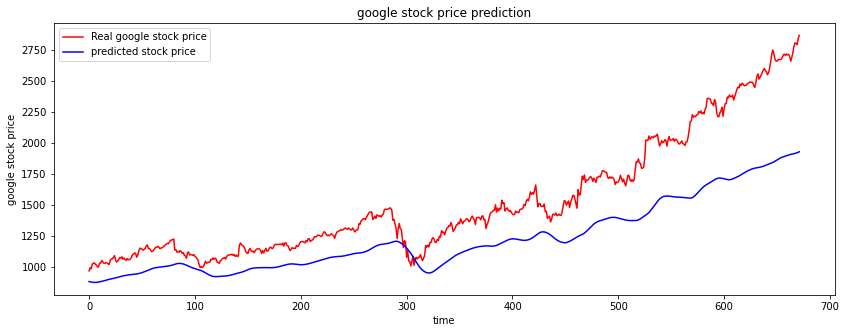

In [50]:
plt.figure(figsize=(14,5))
plt.plot(y_test,color='red',label='Real google stock price')
plt.plot(y_pred,color='blue',label='predicted stock price')
plt.title('google stock price prediction')
plt.xlabel('time')
plt.ylabel('google stock price')
plt.legend()
plt.show()